In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score

# Load the datasets
def load_data():
    train_data = pd.read_csv('training_testing_validation_data/training_set.csv')
    validation_data = pd.read_csv('training_testing_validation_data/validation_set.csv')
    test_data = pd.read_csv('training_testing_validation_data/test_set.csv')
    return train_data, validation_data, test_data

# Function to apply PCA
def apply_pca(X_train, X_val, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)
    return pd.DataFrame(X_train_pca), pd.DataFrame(X_val_pca), pd.DataFrame(X_test_pca), pca

# Main function to handle the entire process
def process_data(train_data, validation_data, test_data, dependent_vars, pca_components=None, variance_threshold=None):
    results = {}
    X_train = train_data.drop(columns=dependent_vars)
    X_val = validation_data.drop(columns=dependent_vars)
    X_test = test_data.drop(columns=dependent_vars)
    
    if pca_components:
        X_train, X_val, X_test, _ = apply_pca(X_train, X_val, X_test, pca_components)
    elif variance_threshold:
        X_train, X_val, X_test, _ = apply_pca(X_train, X_val, X_test, variance_threshold)
    
    for dep_var in dependent_vars:
        y_train = train_data[dep_var].astype(int)
        y_val = validation_data[dep_var].astype(int)
        y_test = test_data[dep_var].astype(int)
        
        # Perform cross-validation to check for overfitting
        X_combined = pd.concat([X_train, X_val], axis=0)
        y_combined = pd.concat([y_train, y_val], axis=0)
        
        model = RandomForestClassifier(random_state=42)
        cv_scores = cross_val_score(model, X_combined, y_combined, cv=5)
        print(f"Cross-validation scores for {dep_var}: {cv_scores}")
        
        # Train and evaluate the model
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        val_report = classification_report(y_val, y_val_pred, output_dict=True)
        
        y_test_pred = model.predict(X_test)
        test_report = classification_report(y_test, y_test_pred, output_dict=True)
        
        results[dep_var] = {'Validation Report': val_report, 'Test Report': test_report}
    
    return results

# Load data
train_data, validation_data, test_data = load_data()

# Define the dependent variables
dependent_vars = ['Alpha_gt_3', 'Alpha_gt_5', 'Alpha_gt_10']

# 1. Using the entire dataset
print("Using the entire dataset:")
results_entire_dataset = process_data(train_data, validation_data, test_data, dependent_vars)

# 2. Using the first 3 PCA components
print("Using the first 3 PCA components:")
results_pca_3 = process_data(train_data, validation_data, test_data, dependent_vars, pca_components=3)

# 3. Using the PCA components that explain 70% of the variance
print("Using the PCA components that explain 70% of the variance:")
results_pca_70 = process_data(train_data, validation_data, test_data, dependent_vars, variance_threshold=0.70)

# Display the results
print("Results using the entire dataset:")
for dep_var, reports in results_entire_dataset.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using the first 3 PCA components:")
for dep_var, reports in results_pca_3.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using PCA components that explain 70% of the variance:")
for dep_var, reports in results_pca_70.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")


Using the entire dataset:
Cross-validation scores for Alpha_gt_3: [0.99970913 0.99970913 0.99883653 0.99621873 0.99592787]
Cross-validation scores for Alpha_gt_5: [0.9991274  0.9982548  0.99883653 0.99796393 0.99505526]
Cross-validation scores for Alpha_gt_10: [1.         1.         0.99796393 0.99505526 0.99534613]
Using the first 3 PCA components:
Cross-validation scores for Alpha_gt_3: [0.99941827 1.         0.99941827 0.99970913 0.99970913]
Cross-validation scores for Alpha_gt_5: [0.99970913 0.99970913 0.99941827 1.         0.99941827]
Cross-validation scores for Alpha_gt_10: [1.         1.         0.99883653 0.99970913 0.99970913]
Using the PCA components that explain 70% of the variance:
Cross-validation scores for Alpha_gt_3: [0.99883653 1.         0.99941827 0.99941827 0.99941827]
Cross-validation scores for Alpha_gt_5: [0.9991274  0.99941827 0.99941827 0.99970913 0.99941827]
Cross-validation scores for Alpha_gt_10: [1.         0.99970913 0.99883653 0.99970913 0.99883653]
Resul

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Load the datasets
def load_data():
    train_data = pd.read_csv('training_testing_validation_data/training_set.csv')
    validation_data = pd.read_csv('training_testing_validation_data/validation_set.csv')
    test_data = pd.read_csv('training_testing_validation_data/test_set.csv')
    return train_data, validation_data, test_data

# Function to apply PCA
def apply_pca(X_train, X_val, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)
    return pd.DataFrame(X_train_pca), pd.DataFrame(X_val_pca), pd.DataFrame(X_test_pca), pca

# Main function to handle the entire process
def process_data(train_data, validation_data, test_data, dependent_vars, model_type='rf', pca_components=None, variance_threshold=None):
    results = {}
    X_train = train_data.drop(columns=dependent_vars)
    X_val = validation_data.drop(columns=dependent_vars)
    X_test = test_data.drop(columns=dependent_vars)
    
    if pca_components:
        X_train, X_val, X_test, _ = apply_pca(X_train, X_val, X_test, pca_components)
    elif variance_threshold:
        X_train, X_val, X_test, _ = apply_pca(X_train, X_val, X_test, variance_threshold)
    
    for dep_var in dependent_vars:
        y_train = train_data[dep_var].astype(int)
        y_val = validation_data[dep_var].astype(int)
        y_test = test_data[dep_var].astype(int)
        
        # Perform cross-validation to check for overfitting
        X_combined = pd.concat([X_train, X_val], axis=0)
        y_combined = pd.concat([y_train, y_val], axis=0)
        
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42)
        elif model_type == 'lr':
            model = LogisticRegression(random_state=42, max_iter=1000)
        
        cv_scores = cross_val_score(model, X_combined, y_combined, cv=5)
        print(f"Cross-validation scores for {dep_var} with {model_type}: {cv_scores}")
        
        # Train and evaluate the model
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        val_report = classification_report(y_val, y_val_pred, output_dict=True)
        
        y_test_pred = model.predict(X_test)
        test_report = classification_report(y_test, y_test_pred, output_dict=True)
        
        results[dep_var] = {'Validation Report': val_report, 'Test Report': test_report}
    
    return results

# Load data
train_data, validation_data, test_data = load_data()

# Define the dependent variables
dependent_vars = ['Alpha_gt_3', 'Alpha_gt_5', 'Alpha_gt_10']

# 1. Using the entire dataset with RandomForestClassifier
print("Using the entire dataset with RandomForestClassifier:")
results_entire_dataset_rf = process_data(train_data, validation_data, test_data, dependent_vars, model_type='rf')

# 2. Using the first 3 PCA components with RandomForestClassifier
print("Using the first 3 PCA components with RandomForestClassifier:")
results_pca_3_rf = process_data(train_data, validation_data, test_data, dependent_vars, model_type='rf', pca_components=3)

# 3. Using the PCA components that explain 70% of the variance with RandomForestClassifier
print("Using the PCA components that explain 70% of the variance with RandomForestClassifier:")
results_pca_70_rf = process_data(train_data, validation_data, test_data, dependent_vars, model_type='rf', variance_threshold=0.70)

# 4. Using the entire dataset with LogisticRegression
print("Using the entire dataset with LogisticRegression:")
results_entire_dataset_lr = process_data(train_data, validation_data, test_data, dependent_vars, model_type='lr')

# 5. Using the first 3 PCA components with LogisticRegression
print("Using the first 3 PCA components with LogisticRegression:")
results_pca_3_lr = process_data(train_data, validation_data, test_data, dependent_vars, model_type='lr', pca_components=3)

# 6. Using the PCA components that explain 70% of the variance with LogisticRegression
print("Using the PCA components that explain 70% of the variance with LogisticRegression:")
results_pca_70_lr = process_data(train_data, validation_data, test_data, dependent_vars, model_type='lr', variance_threshold=0.70)

# Display the results for RandomForestClassifier
print("Results using the entire dataset with RandomForestClassifier:")
for dep_var, reports in results_entire_dataset_rf.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using the first 3 PCA components with RandomForestClassifier:")
for dep_var, reports in results_pca_3_rf.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using the PCA components that explain 70% of the variance with RandomForestClassifier:")
for dep_var, reports in results_pca_70_rf.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

# Display the results for LogisticRegression
print("Results using the entire dataset with LogisticRegression:")
for dep_var, reports in results_entire_dataset_lr.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using the first 3 PCA components with LogisticRegression:")
for dep_var, reports in results_pca_3_lr.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using the PCA components that explain 70% of the variance with LogisticRegression:")
for dep_var, reports in results_pca_70_lr.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")


Using the entire dataset with RandomForestClassifier:
Cross-validation scores for Alpha_gt_3 with rf: [0.99970913 0.99970913 0.99883653 0.99621873 0.99592787]
Cross-validation scores for Alpha_gt_5 with rf: [0.9991274  0.9982548  0.99883653 0.99796393 0.99505526]
Cross-validation scores for Alpha_gt_10 with rf: [1.         1.         0.99796393 0.99505526 0.99534613]
Using the first 3 PCA components with RandomForestClassifier:
Cross-validation scores for Alpha_gt_3 with rf: [0.99941827 1.         0.99941827 0.99970913 0.99970913]
Cross-validation scores for Alpha_gt_5 with rf: [0.99970913 0.99970913 0.99941827 1.         0.99941827]
Cross-validation scores for Alpha_gt_10 with rf: [1.         1.         0.99883653 0.99970913 0.99970913]
Using the PCA components that explain 70% of the variance with RandomForestClassifier:
Cross-validation scores for Alpha_gt_3 with rf: [0.99883653 1.         0.99941827 0.99941827 0.99941827]
Cross-validation scores for Alpha_gt_5 with rf: [0.9991274  

Using the entire dataset with RandomForestClassifier:
Cross-validation scores for Alpha_gt_3 with rf: [0.99970913 0.99970913 0.99883653 0.99621873 0.99592787]


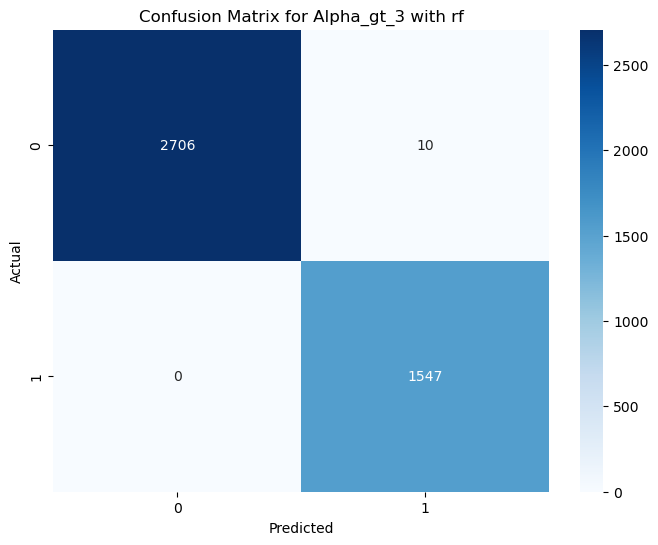

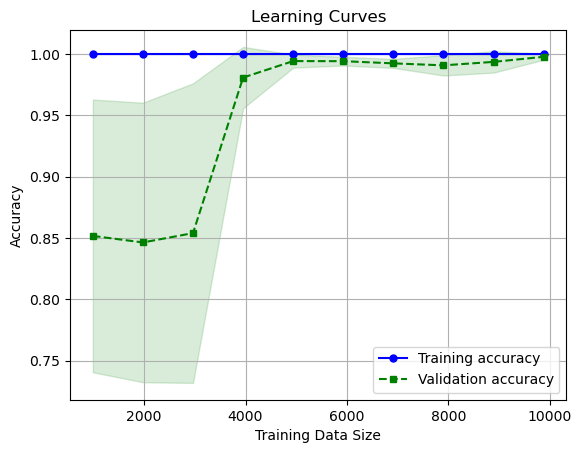

Cross-validation scores for Alpha_gt_5 with rf: [0.9991274  0.9982548  0.99883653 0.99796393 0.99505526]


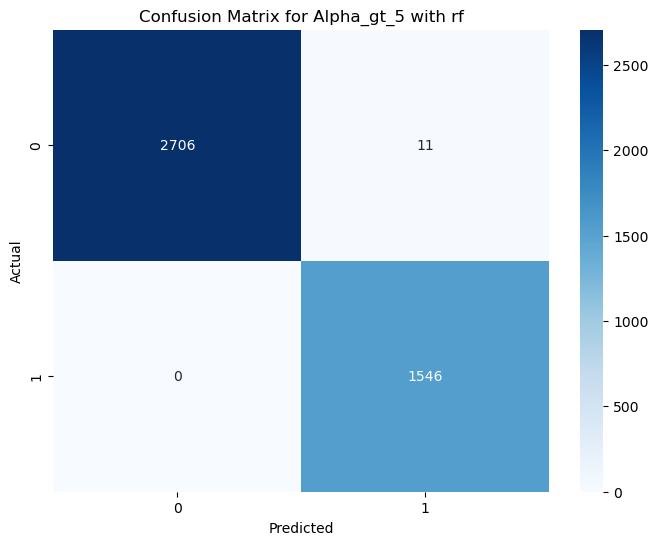

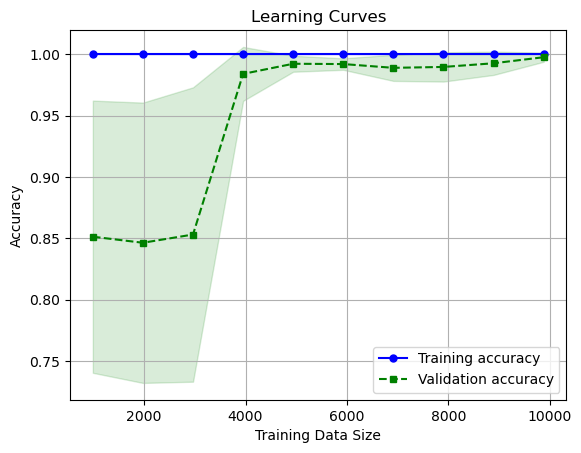

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets
def load_data():
    train_data = pd.read_csv('training_testing_validation_data/training_set.csv')
    validation_data = pd.read_csv('training_testing_validation_data/validation_set.csv')
    test_data = pd.read_csv('training_testing_validation_data/test_set.csv')
    return train_data, validation_data, test_data

# Function to apply PCA
def apply_pca(X_train, X_val, X_test, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)
    return pd.DataFrame(X_train_pca), pd.DataFrame(X_val_pca), pd.DataFrame(X_test_pca), pca

# Plot learning curves
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curves')
    plt.xlabel('Training Data Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Main function to handle the entire process
def process_data(train_data, validation_data, test_data, dependent_vars, model_type='rf', pca_components=None, variance_threshold=None):
    results = {}
    X_train = train_data.drop(columns=dependent_vars)
    X_val = validation_data.drop(columns=dependent_vars)
    X_test = test_data.drop(columns=dependent_vars)
    
    if pca_components:
        X_train, X_val, X_test, _ = apply_pca(X_train, X_val, X_test, pca_components)
    elif variance_threshold:
        X_train, X_val, X_test, _ = apply_pca(X_train, X_val, X_test, variance_threshold)
    
    for dep_var in dependent_vars:
        y_train = train_data[dep_var].astype(int)
        y_val = validation_data[dep_var].astype(int)
        y_test = test_data[dep_var].astype(int)
        
        # Perform stratified cross-validation to check for overfitting
        skf = StratifiedKFold(n_splits=5)
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=42)
        elif model_type == 'lr':
            model = LogisticRegression(random_state=42, max_iter=1000)
        
        cv_scores = cross_val_score(model, pd.concat([X_train, X_val]), pd.concat([y_train, y_val]), cv=skf)
        print(f"Cross-validation scores for {dep_var} with {model_type}: {cv_scores}")
        
        # Train and evaluate the model
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        val_report = classification_report(y_val, y_val_pred, output_dict=True)
        y_test_pred = model.predict(X_test)
        test_report = classification_report(y_test, y_test_pred, output_dict=True)
        
        # Plot confusion matrix
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
        plt.title(f'Confusion Matrix for {dep_var} with {model_type}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        # Plot learning curves
        plot_learning_curves(model, X_train, y_train)
        
        results[dep_var] = {'Validation Report': val_report, 'Test Report': test_report}
    
    return results

# Load data
train_data, validation_data, test_data = load_data()

# Define the dependent variables
dependent_vars = ['Alpha_gt_3', 'Alpha_gt_5', 'Alpha_gt_10']

# Using the entire dataset with RandomForestClassifier
print("Using the entire dataset with RandomForestClassifier:")
results_entire_dataset_rf = process_data(train_data, validation_data, test_data, dependent_vars, model_type='rf')

# Using the first 3 PCA components with RandomForestClassifier
print("Using the first 3 PCA components with RandomForestClassifier:")
results_pca_3_rf = process_data(train_data, validation_data, test_data, dependent_vars, model_type='rf', pca_components=3)

# Using the PCA components that explain 70% of the variance with RandomForestClassifier
print("Using the PCA components that explain 70% of the variance with RandomForestClassifier:")
results_pca_70_rf = process_data(train_data, validation_data, test_data, dependent_vars, model_type='rf', variance_threshold=0.70)

# Using the entire dataset with LogisticRegression
print("Using the entire dataset with LogisticRegression:")
results_entire_dataset_lr = process_data(train_data, validation_data, test_data, dependent_vars, model_type='lr')

# Using the first 3 PCA components with LogisticRegression
print("Using the first 3 PCA components with LogisticRegression:")
results_pca_3_lr = process_data(train_data, validation_data, test_data, dependent_vars, model_type='lr', pca_components=3)

# Using the PCA components that explain 70% of the variance with LogisticRegression
print("Using the PCA components that explain 70% of the variance with LogisticRegression:")
results_pca_70_lr = process_data(train_data, validation_data, test_data, dependent_vars, model_type='lr', variance_threshold=0.70)

# Display the results for RandomForestClassifier
print("Results using the entire dataset with RandomForestClassifier:")
for dep_var, reports in results_entire_dataset_rf.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using the first 3 PCA components with RandomForestClassifier:")
for dep_var, reports in results_pca_3_rf.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using the PCA components that explain 70% of the variance with RandomForestClassifier:")
for dep_var, reports in results_pca_70_rf.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

# Display the results for LogisticRegression
print("Results using the entire dataset with LogisticRegression:")
for dep_var, reports in results_entire_dataset_lr.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using the first 3 PCA components with LogisticRegression:")
for dep_var, reports in results_pca_3_lr.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")

print("Results using the PCA components that explain 70% of the variance with LogisticRegression:")
for dep_var, reports in results_pca_70_lr.items():
    print(f"Dependent variable: {dep_var}")
    print("Validation Report:")
    print(pd.DataFrame(reports['Validation Report']).transpose())
    print("\nTest Report:")
    print(pd.DataFrame(reports['Test Report']).transpose())
    print("\n")
